In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
car_data = pd.read_csv('CarPrice_Assignment.csv')

# Inspect the dataset
print("Dataset Info:")
print(car_data.info())
print("\nDataset Head:")
print(car_data.head())

# Check for missing values
print("\nMissing Values:")
print(car_data.isnull().sum())

# Check for duplicates
duplicates = car_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
car_data = car_data.drop_duplicates()

# Drop irrelevant columns (example: Car_ID)
if 'Car_ID' in car_data.columns:
    car_data.drop(columns=['Car_ID'], inplace=True)

# Convert categorical variables to numerical (e.g., one-hot encoding for "CarName")
car_data = pd.get_dummies(car_data, drop_first=True)

# Split the data into features and target variable
X = car_data.drop(columns=['price'])
y = car_data['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing Complete. Ready for modeling!")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null

In [3]:
#Implementation for Regression Models
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Dictionary to store model performance
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store results
    model_performance[name] = {"R-squared": r2, "MSE": mse, "MAE": mae}

# Display model performance
print("Model Performance Comparison:")
for model_name, metrics in model_performance.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")

Model Performance Comparison:

Linear Regression:
R-squared: -5092680174140201573023744.0000
MSE: 402036650000742768564696237735936.0000
MAE: 11096924181087860.0000

Decision Tree Regressor:
R-squared: 0.8666
MSE: 10532678.5297
MAE: 2098.3090

Random Forest Regressor:
R-squared: 0.9537
MSE: 3652007.2005
MAE: 1378.8925

Gradient Boosting Regressor:
R-squared: 0.9316
MSE: 5402849.3765
MAE: 1685.6164

Support Vector Regressor:
R-squared: -0.1017
MSE: 86973995.1459
MAE: 5705.0610


In [5]:
#Model Evaluation
# Evaluate and compare model performance
print("Model Performance Metrics:\n")
print(f"{'Model':<30} {'R-squared':<15} {'MSE':<15} {'MAE':<15}")
print("-" * 65)

for model_name, metrics in model_performance.items():
    r2 = metrics["R-squared"]
    mse = metrics["MSE"]
    mae = metrics["MAE"]
    print(f"{model_name:<30} {r2:<15.4f} {mse:<15.4f} {mae:<15.4f}")

Model Performance Metrics:

Model                          R-squared       MSE             MAE            
-----------------------------------------------------------------
Linear Regression              -5092680174140201573023744.0000 402036650000742768564696237735936.0000 11096924181087860.0000
Decision Tree Regressor        0.8666          10532678.5297   2098.3090      
Random Forest Regressor        0.9537          3652007.2005    1378.8925      
Gradient Boosting Regressor    0.9316          5402849.3765    1685.6164      
Support Vector Regressor       -0.1017         86973995.1459   5705.0610      


C:\Users\RAJAGIRI ATL\AppData\Local\Temp\ipykernel_19040\3028799828.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


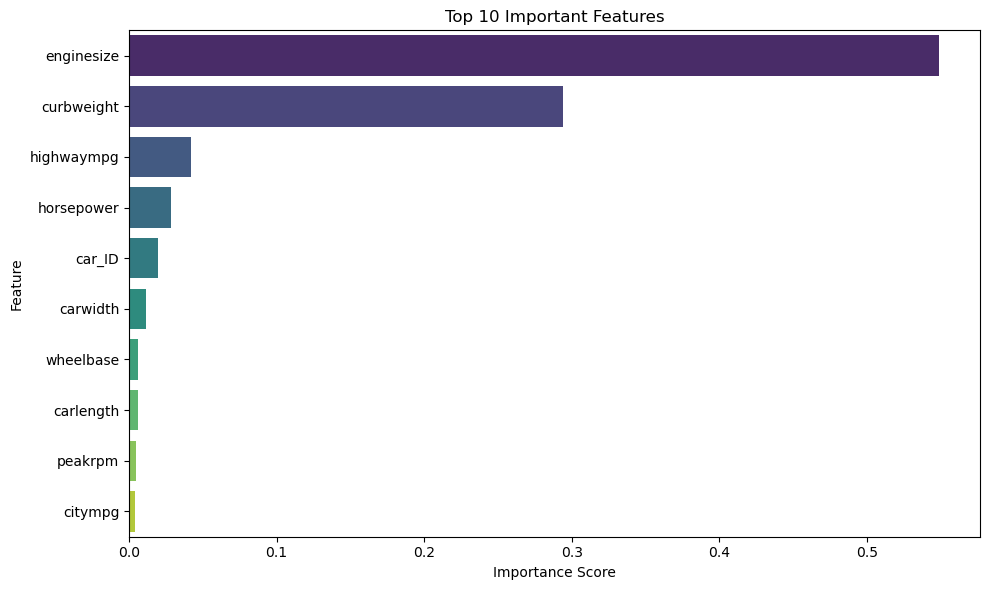

Feature Importances:
                              Feature  Importance
7                          enginesize    0.549018
6                          curbweight    0.293698
14                         highwaympg    0.041858
11                         horsepower    0.028179
0                              car_ID    0.019694
..                                ...         ...
131  CarName_toyota corolla 1600 (sw)    0.000000
60        CarName_isuzu D-Max V-Cross    0.000000
143          CarName_vokswagen rabbit    0.000000
93               CarName_nissan nv200    0.000000
119               CarName_subaru baja    0.000000

[190 rows x 2 columns]


In [7]:
#Feature Importance Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest for feature importance analysis
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# Extract feature importance
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot the top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print all feature importances
print("Feature Importances:")
print(importance_df)

In [10]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Display results
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [11]:
print("\nPerformance of the Tuned Random Forest Model:")


Performance of the Tuned Random Forest Model:


In [14]:
print(f"R-squared: {r2:.4f}")

R-squared: 0.9425


In [16]:
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 4541322.2821


In [18]:
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 1485.9455
